## IMPORT ALL REQUIRED LIBRARIES





In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import drive
from google.colab import files
import os
from sklearn.model_selection import train_test_split
import random
from shutil import copyfile
import numpy as np
from matplotlib import pyplot as plt

## LOAD DATA FROM GOOGLE DRIVE

In [ ]:
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data'
os.mkdir(base_dir)
original_dataset_dir = "/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset"
!ls "{original_dataset_dir}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Caries	Gingivitis  Healthy_Tooth  Periodontitis  Tooth_Discolor


## PARSE DATA INTO TRAIN AND VALIDATION FOLDER

In [ ]:
# create two folders in base_dir train and val
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
# under train folder create 5 folder (caries, gingivitis, periodontitis, tooth discolor, and healthy tooth)
train_caries_dir = os.path.join(train_dir, 'caries')
os.mkdir(train_caries_dir)
train_gingivitis_dir = os.path.join(train_dir, 'gingivitis')
os.mkdir(train_gingivitis_dir)
train_periodontitis_dir = os.path.join(train_dir, 'periodontitis')
os.mkdir(train_periodontitis_dir)
train_tootdisc_dir = os.path.join(train_dir, 'tooth_discolor')
os.mkdir(train_tootdisc_dir)
train_healthy_dir = os.path.join(train_dir, 'healthy_tooth')
os.mkdir(train_healthy_dir)

In [ ]:
# under validation folder create 5 folder (caries, gingivitis, periodontitis, tooth discolor, and healthy tooth)
validation_caries_dir = os.path.join(validation_dir, 'caries')
os.mkdir(validation_caries_dir)
validation_gingivitis_dir = os.path.join(validation_dir, 'gingivitis')
os.mkdir(validation_gingivitis_dir)
validation_periodontitis_dir = os.path.join(validation_dir, 'periodontitis')
os.mkdir(validation_periodontitis_dir)
validation_tootdisc_dir = os.path.join(validation_dir, 'tooth_discolor')
os.mkdir(validation_tootdisc_dir)
validation_healthy_dir = os.path.join(validation_dir, 'healthy_tooth')
os.mkdir(validation_healthy_dir)

In [ ]:
#function split data
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[:valid_length]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        copyfile(this_file, destination)

In [ ]:
#Split source
CARIES_SOURCE_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset/Caries/'
TRAINING_CARIES_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/caries/'
VALID_CARIES_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/validation/caries/'

GINGIVITIS_SOURCE_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset/Gingivitis/'
TRAINING_GINGIVITIS_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/gingivitis/'
VALID_GINGIVITIS_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/validation/gingivitis/'

PERIODONTITIS_SOURCE_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset/Periodontitis/'
TRAINING_PERIODONTITIS_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/periodontitis/'
VALID_PERIODONTITIS_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/validation/periodontitis/'

TOOTHDISC_SOURCE_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset/Tooth_Discolor/'
TRAINING_TOOTHDISC_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/tooth_discolor/'
VALID_TOOTHDISC_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/validation/tooth_discolor/'

HEALTHY_SOURCE_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/Original Dataset/Healthy_Tooth/'
TRAINING_HEALTHY_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/healthy_tooth/'
VALID_HEALTHY_DIR = '/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/validation/healthy_tooth/'

In [ ]:
# split data
split_size = 0.6

split_data(CARIES_SOURCE_DIR, TRAINING_CARIES_DIR, VALID_CARIES_DIR, split_size)
split_data(GINGIVITIS_SOURCE_DIR, TRAINING_GINGIVITIS_DIR, VALID_GINGIVITIS_DIR, split_size)
split_data(PERIODONTITIS_SOURCE_DIR, TRAINING_PERIODONTITIS_DIR, VALID_PERIODONTITIS_DIR, split_size)
split_data(TOOTHDISC_SOURCE_DIR, TRAINING_TOOTHDISC_DIR, VALID_TOOTHDISC_DIR, split_size)
split_data(HEALTHY_SOURCE_DIR, TRAINING_HEALTHY_DIR, VALID_HEALTHY_DIR, split_size)

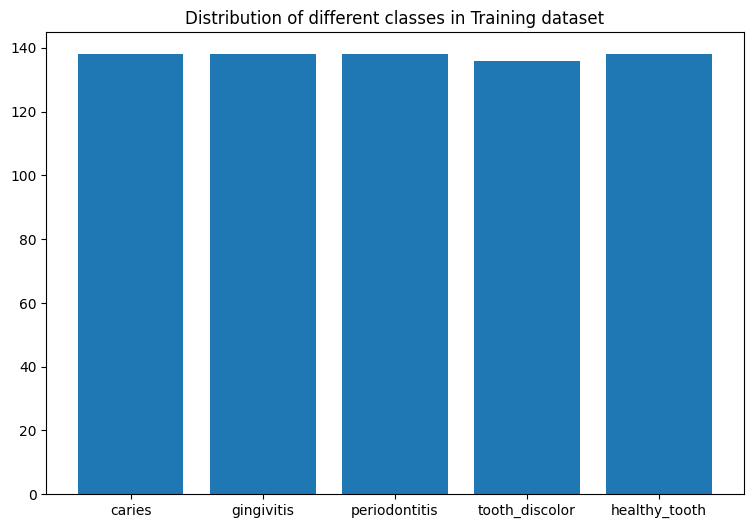

In [ ]:
#show training data
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['caries', 'gingivitis', 'periodontitis', 'tooth_discolor','healthy_tooth']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training dataset')
plt.show()

In [ ]:
for i in image_folder:
    print('Total images in {} train folder: {}'.format(i, len(os.listdir('/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/' + i + '/'))))

Total images in caries train folder: 138
Total images in gingivitis train folder: 138
Total images in periodontitis train folder: 138
Total images in tooth_discolor train folder: 136
Total images in healthy_tooth train folder: 138


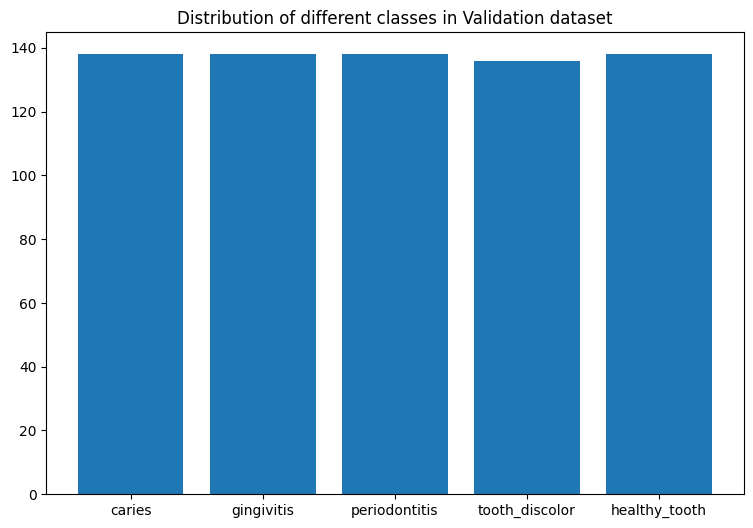

In [ ]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation dataset')
plt.show()

In [ ]:
for i in image_folder:
    print('Total images in {} validation folder: {}'.format(i, len(os.listdir('/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/' + i + '/'))))

Total images in caries validation folder: 138
Total images in gingivitis validation folder: 138
Total images in periodontitis validation folder: 138
Total images in tooth_discolor validation folder: 136
Total images in healthy_tooth validation folder: 138


## Modelling

In [ ]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(224, 224, 3))
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 base
model = Sequential()
model.add(base_model)
# Add your own classification layers on top
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6

### Preprocessing



In [ ]:
# Set the image size and batch size
img_width, img_height = 224, 224
batch_size = 32
# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    shear_range=0.2,  # Randomly apply shearing transformation
    zoom_range=0.2,  # Randomly apply zooming transformation
    horizontal_flip=True)
# Data normalization for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of training data with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')  # Assuming categorical labels

# Generate batches of validation data without augmentation
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
# Get the number of training and validation samples
num_train_samples = train_generator.samples
num_val_samples = val_generator.samples

# Calculate the number of steps per epoch for training and validation
train_steps_per_epoch = num_train_samples // batch_size
val_steps_per_epoch = num_val_samples // batch_size

Found 578 images belonging to 5 classes.
Found 388 images belonging to 5 classes.


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Epoch (ini lama bgt)
history = model.fit(train_generator,
                    epochs=200,
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr]
                   )

Epoch 1/200
19/19 [==============================] - 605s 32s/step - loss: 3.6378 - accuracy: 0.3408 - val_loss: 1.2340 - val_accuracy: 0.5722 - lr: 0.0010
Epoch 2/200
19/19 [==============================] - 601s 32s/step - loss: 1.4445 - accuracy: 0.3564 - val_loss: 1.1606 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 3/200
19/19 [==============================] - 591s 32s/step - loss: 1.4808 - accuracy: 0.3235 - val_loss: 1.3181 - val_accuracy: 0.5696 - lr: 0.0010
Epoch 4/200
19/19 [==============================] - 547s 29s/step - loss: 1.4016 - accuracy: 0.3945 - val_loss: 1.1442 - val_accuracy: 0.5979 - lr: 0.0010
Epoch 5/200
19/19 [==============================] - 591s 32s/step - loss: 1.3861 - accuracy: 0.4118 - val_loss: 1.1680 - val_accuracy: 0.5747 - lr: 0.0010
Epoch 6/200
19/19 [==============================] - 590s 32s/step - loss: 1.3063 - accuracy: 0.4170 - val_loss: 0.9843 - val_accuracy: 0.6598 - lr: 0.0010
Epoch 7/200
19/19 [==============================] - 590s 32s/st

## Visualization

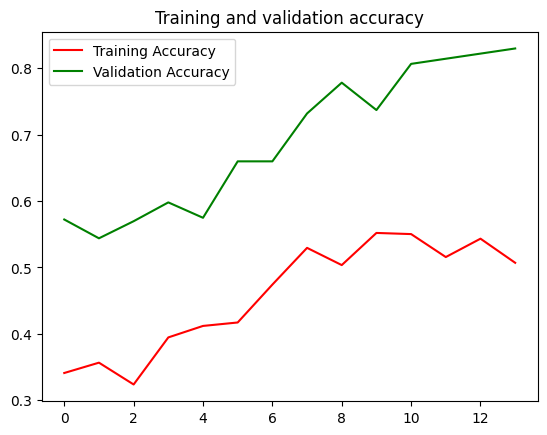

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot hasil training dan validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()

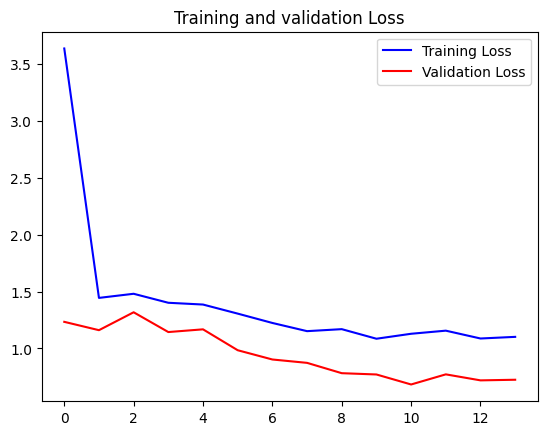

<Figure size 640x480 with 0 Axes>

In [ ]:
#Training and Validation Loss is
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training and validation Loss")
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

##Model Prediction

In [ ]:
# upload image
uploaded = files.upload()

Saving c.jfif to c.jfif


In [ ]:
# label for image
labels = os.listdir('/content/drive/MyDrive/Model ML Healthy Teeth/Dataset/New-Data/train/')
for label in labels:
  print(label)

caries
gingivitis
periodontitis
tooth_discolor
healthy_tooth


##Predict and Recommendation

1/1 [==============================] - 0s 478ms/step
c.jfif
Diagnosis: healthy_tooth
Healthy teeth are teeth that have a complete crown shape, no holes or indentations that feel rough, white bones without any plaque and stains that can change the color of the teeth, and neat teeth without gaps or mess.
Characteristics: 
1. Slightly yellowish white teeth 
2. Strong and sturdy teeth 
3. Pink gums 
4. The tongue is pink and wet 
5. No holes in the teeth 
6. Breath does not smell
How to Maintain:
1. Brush teeth twice a day.
2. Don't forget to clean your tongue.
3. Using fluoride toothpaste.
4. Clean teeth with floss once a day
5. Gargling with mouthwash
6. Visit the dentist every 6 months


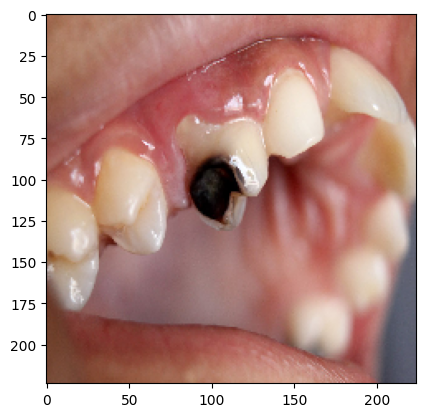

In [ ]:
# predicting image
for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  prob = model.predict(images)[0]
  classes = int(prob.argmax(axis = -1))

  print(fn)
  print("Diagnosis: " + labels[classes])

  # diagnosis reccomendation
  if labels[classes] == 'caries':
        print("Dental caries disease is tooth decay that occurs in the hard tissues of the teeth, starting from the tooth enamel to the root of the tooth, and is caused by the activity of microorganisms in fermentable carbohydrates.")
        print("Causes: frequent consumption of sweet foods, dry mouth, gastroesophageal reflux disease (GERD), eating disorders, and age factor.")
        print("Symptoms: \n1. Bad breath. \n2.Sudden pain in the teeth for no apparent reason. \n3.Appearance of obvious holes in the teeth. \n4.Teeth become more sensitive. \n5.Teeth hurt when eating sweet, cold, or hot foods.")
        print("Treatments: dental fillings, root canal therapy, or tooth extraction.")
        print("How to Prevent:")
        print("1. Clean your teeth with a toothbrush and floss, at least twice a day.")
        print("2. Gargle with a mouthwash that contains fluoride or use salt water.")
        print("3. Limit consumption of sweet foods and drinks.")
        print("4. Perform dental care with antibacterial.")
        print("5. Use toothpaste that contains fluoride.")
        print("6. Have regular dental check-ups at least once every 6 months.")
  elif labels[classes] == 'gingivitis':
        print("Gingivitis is inflammation of the gums (gingiva), with the main etiology being plaque bacteria, which are pathogenic. The accumulation of bacteria in the plaque can stimulate the gingival inflammatory process, which leads to damage to the periodontium.")
        print("Causes: do not maintain a healthy mouth and teeth, lazy brushing teeth, there is a history of gingivitis in the family, aged, improper use of dentures, lack of nutrients (including vitamin C), smoking habit, viral or fungal infection, dry mouth, consumption of certain drugs, history of disease (such as diabetes, leukemia, or HIV/AIDS).")
        print("Symptoms: \n1. Swollen and sore gums. \n2. Bleeding gums easily. \n3. Reddish color of the gums. \n4. Bad breath. \n5. Pain when chewing food. \n6. Pus between the teeth and gums\n7. Receding gums.")
        print("Treatments: scaling (cleaning tartar), filling or replacing damaged teeth.")
        print("How to Prevent:")
        print("1. Brush your teeth every day, at least twice a day.")
        print("2. Use a soft toothbrush and be diligent about changing your toothbrush at least once every 4 months.")
        print("3. Clean your teeth after every meal and before going to bed at night.")
        print("4. Flossing your teeth at least once a day can reduce the risk of developing gum disease.")
        print("5. Use toothpaste that contains fluoride.")
        print("6. Use mouthwash that can help reduce plaque on the teeth and gingivitis.")
  elif labels[classes] == 'healthy_tooth':
        print("Healthy teeth are teeth that have a complete crown shape, no holes or indentations that feel rough, white bones without any plaque and stains that can change the color of the teeth, and neat teeth without gaps or mess.")
        print("Characteristics: \n1. Slightly yellowish white teeth \n2. Strong and sturdy teeth \n3. Pink gums \n4. The tongue is pink and wet \n5. No holes in the teeth \n6. Breath does not smell")
        print("How to Maintain:")
        print("1. Brush teeth twice a day.")
        print("2. Don't forget to clean your tongue.")
        print("3. Using fluoride toothpaste.")
        print("4. Clean teeth with floss once a day")
        print("5. Gargling with mouthwash")
        print("6. Visit the dentist every 6 months")
  elif labels[classes] == 'periodontitis':
        print("Periodontitis is a destructive inflammatory disease of the supporting tissues of the teeth caused by specific microorganisms cause progressive damage to periodontal ligament and alveolar bone.")
        print("Causes: obesity, genetic factor, lack of nutrients (including vitamin C), lack of care to clean teeth and mouth, the habit of smoking or chewing tobacco, taking drugs that reduce saliva production, hormonal changes (during menstruation, pregnancy, or menopause), certain diseases (such as Down syndrome, Crohn's disease, diabetes, and rheumatoid arthritis), conditions that reduce the body's immune system (such as leukemia, HIV/AIDS, or currently undergoing chemotherapy)")
        print("Symptoms: \n1. Pain when chewing. \n2. Plaque and tartar buildup on teeth. \n3. The distance between one tooth and another feels tenuous. \n4. The gums recede making the teeth look longer. \n5. Gums are reddish or purplish in color. \n6. The gums are painful to the touch. \n7. Gums are swollen and bleed easily. \n8. Pus discharge from the teeth and gums. \n9. Loose or loose teeth. \n10. Sensitive teeth. \n11. Bad breath.")
        print("Treatments: \n1. Scaling (cleaning tartar). \n2. Root planing. \n3. Receive oral antibiotics, mouthwashes, or gels. \n4. Extraction of affected teeth.")
        print("How to Prevent:")
        print("1. Brush your teeth regularly, at least twice a day.")
        print("2. Clean between the teeth using dental floss.")
        print("3. Avoid smoking and using vape.")
        print("4. Avoid activities that can trigger stress.")
        print("5. Adopt a healthy and balanced diet.")
        print("6. Take regular control and treatment if you have diabetes.")
        print("7. Maintain ideal body weight or lose weight if you are obese.")
  elif labels[classes] == 'tooth_discolor':
        print("Tooth discoloration refers to any changes in the color of the teeth, resulting in a deviation from the normal shade of white or yellowish-white. It can manifest as localized or generalized staining, affecting one or multiple teeth.")
        print("Causes: \n1. Staining due to the color of the food and drink consumed. \n2. The use of tobacco products, tea, coffee, certain mouthwashes, and pigments in food. \n3. Chemicals or drugs. \n4. There is necrosis of the pulp (tooth death) due to cavities or trauma to the tooth. \n5. Aging. ")
        print("Symptoms: \n1. Changes in the color of the teeth that appear from brownish yellow, gray, to black. \n2. Can be complained of only on one tooth or all the teeth in the mouth.")
        print("Treatments: bleaching (using teeth whitening agents).")
        print("How to Prevent:")
        print("1. Reduce consumption of colored foodstuffs such as tea and coffee.")
        print("2. Keep food temperature from being too extreme which can cause pulpal death, and prevent cavities.")
        print("3. Have regular dental check-ups at least once every 6 months.")
        print("4. Avoid smoking and using vape.")

In [ ]:
#Save model in h5
model.save('model200.h5')


In [ ]:
#Converting to TF Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

#Save TF Lite model
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
tflite_model_file= pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

21248048